In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
udf = pd.read_csv("C:/Users/harik/python pratice/00 - datasets-20251216T065029Z-1-001/00 - datasets/Universities.csv", index_col='Univ')
udf.shape

(25, 6)

#### Standardize the data

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(udf)

#### Build the model

In [6]:
from sklearn.decomposition import PCA

In [7]:
model = PCA(n_components=6)
pcomps = model.fit_transform(scaled_data)
pcomps_df = pd.DataFrame(pcomps, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
pcomps_df.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.009874,-1.064310,0.081066,-0.056951,-0.128754,-0.034650
1,2.822238,2.259045,0.836829,-0.143845,-0.125962,-0.180703
2,-1.112466,1.631209,-0.266787,-1.075075,-0.191814,0.345679


In [8]:
exp_var = model.explained_variance_ratio_
exp_var

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

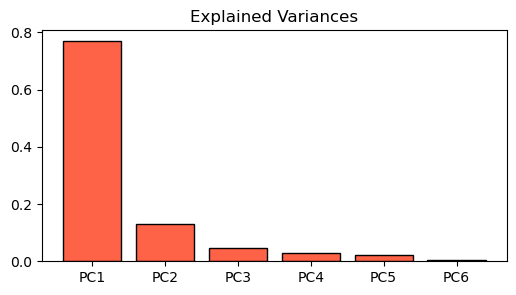

In [9]:
plt.figure(figsize=(6,3))
plt.title('Explained Variances')
plt.bar(pcomps_df.columns, exp_var, 
        color='tomato',
        edgecolor='k'
       )
plt.show()

In [10]:
exp_var.cumsum()

array([0.76868084, 0.89981687, 0.94757718, 0.97487386, 0.99559156,
       1.        ])

In [11]:
final_df = pcomps_df.iloc[:, :2]
final_df.head(3)

,PC1,PC2
0,1.009874,-1.064310
1,2.822238,2.259045
2,-1.112466,1.631209


#### Data Visualisation - Use TSNE

In [12]:
from sklearn.manifold import TSNE

In [13]:
iris = pd.read_csv("C:/Users/harik/python pratice/00 - datasets-20251216T065029Z-1-001/00 - datasets/iris.csv")
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [14]:
features = iris.drop('species',axis=1)

In [15]:
tmodel = TSNE(n_components=2)
tcomps_data = tmodel.fit_transform(features)
tcomps_df = pd.DataFrame(tcomps_data, columns=['TC1','TC2'])
tcomps_df['species'] = iris['species']
tcomps_df.head(3)

,TC1,TC2,species
0,-23.875437,-1.430589,setosa
1,-21.332832,-2.522965,setosa
2,-21.183956,-1.316485,setosa


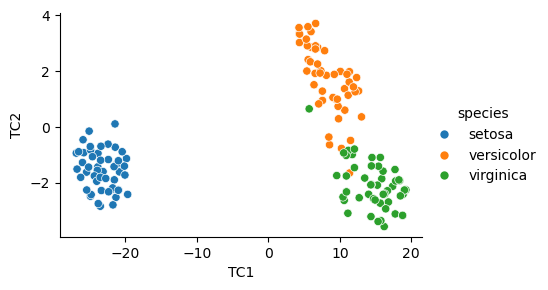

In [16]:
sns.relplot(tcomps_df, x='TC1',y='TC2',
            kind='scatter',
            hue = 'species',
            height=3,
            aspect=1.5
           )
plt.show()